In [1]:
import tensorflow as tf
import numpy as np
import collections
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model 

/Users/ConCa/Documents/DeepLearning/Assignment/LSTM/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def read_data(fname):
    with open(fname, encoding='utf-8') as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    words = []
    for line in content:
        words.extend(line.split())
    return np.array(words)

def build_dataset(words):
    count = collections.Counter(words).most_common()
    word2id = {}
    for word, freq in count:
        word2id[word] = len(word2id)
    id2word = dict(zip(word2id.values(), word2id.keys()))
    return word2id, id2word

In [3]:
data = read_data('truyenkieu.txt')
print(data)
w2i , i2w = build_dataset(data)
vocab_size = len(w2i)
timestep = 3

['Đầu' 'lòng' 'hai' 'ả' 'tố' 'nga' 'Thúy' 'Kiều' 'là' 'chị' 'em' 'là'
 'Thúy' 'Vân' 'Mai' 'cốt' 'cách' 'tuyết' 'tinh' 'thần' 'Mỗi' 'người' 'một'
 'vẻ' 'mười' 'phân' 'vẹn' 'mười' 'Vân' 'xem' 'trang' 'trọng' 'khác' 'vời'
 'Khuôn' 'trăng' 'đầy' 'đặn' 'nét' 'ngài' 'nở' 'nang' 'Hoa' 'cười' 'ngọc'
 'thốt' 'đoan' 'trang' 'Mây' 'thua' 'nước' 'tóc' 'tuyết' 'nhường' 'màu'
 'da' 'Kiều' 'càng' 'sắc' 'sảo' 'mặn' 'mà' 'So' 'bề' 'tài' 'sắc' 'lại'
 'là' 'phần' 'hơn' 'Làn' 'thu' 'thủy' 'nét' 'xuân' 'sơn' 'Hoa' 'ghen'
 'thua' 'thắm' 'liễu' 'hờn' 'kém' 'xanh' 'Một' 'hai' 'nghiêng' 'nước'
 'nghiêng' 'thành' 'Sắc' 'đành' 'đòi' 'một' 'tài' 'đành' 'họa' 'hai'
 'Thông' 'minh' 'vốn' 'sẵn' 'tư' 'trời' 'Pha' 'nghề' 'thi' 'họa' 'đủ'
 'mùi' 'ca' 'ngâm' 'Cung' 'thương' 'làu' 'bậc' 'ngũ' 'âm' 'Nghề' 'riêng'
 'ăn' 'đứt' 'Hồ' 'cầm' 'một' 'trương' 'Khúc' 'nhà' 'tay' 'lựa' 'nên'
 'chương' 'Một' 'thiên' 'bạc' 'mệnh' 'lại' 'càng' 'não' 'nhân' 'Phong'
 'lưu' 'rất' 'mực' 'hồng' 'quần' 'Xuân' 'xanh' 'xấp' 'xỉ' 'tới' 'tuần'
 

In [4]:
X, Y = [], []
for i in range(timestep, len(data)):
    X.append([w2i[data[k]] for k in range(i-timestep, i)])
    Y.append(w2i[data[i]])

encoded_data = [w2i[x] for x in data]
X = encoded_data[:-1]
Y = encoded_data[timestep:]
train_data = tf.keras.preprocessing.timeseries_dataset_from_array(X, Y,  sequence_length=timestep, sampling_rate=1)

2024-10-30 13:53:46.770533: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-30 13:53:46.770551: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-30 13:53:46.770558: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-30 13:53:46.770575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-30 13:53:46.770586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model = tf.keras.Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(timestep, 1)))
model.add(LSTM(512, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

/Users/ConCa/Documents/DeepLearning/Assignment/LSTM/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 512)         │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 143)            │        73,359 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,225,231 (12.30 MB)

 Trainable params: 3,225,231 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

checkpoint = ModelCheckpoint(filepath="model.keras",  monitor="accuracy", save_best_only=True , mode="max")
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
model.save("model.keras")
history = model.fit(train_data, epochs=300 , callbacks = [checkpoint])  


Epoch 1/300


2024-10-30 13:53:47.551811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.0066 - loss: 4.9957
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0332 - loss: 4.8487
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0413 - loss: 4.8045
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0347 - loss: 4.7588
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0387 - loss: 4.6854
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0361 - loss: 4.5904
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.0482 - loss: 4.4963
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0442 - loss: 4.3792
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0416 - loss: 4.2435
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0442 - loss: 4.0857
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.0641 - loss: 3.8967
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0855 - loss: 3.7038


In [7]:
model2 = load_model("model.keras")
model2.evaluate(train_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9746 - loss: 0.5258


[0.5783181190490723, 0.9696969985961914]

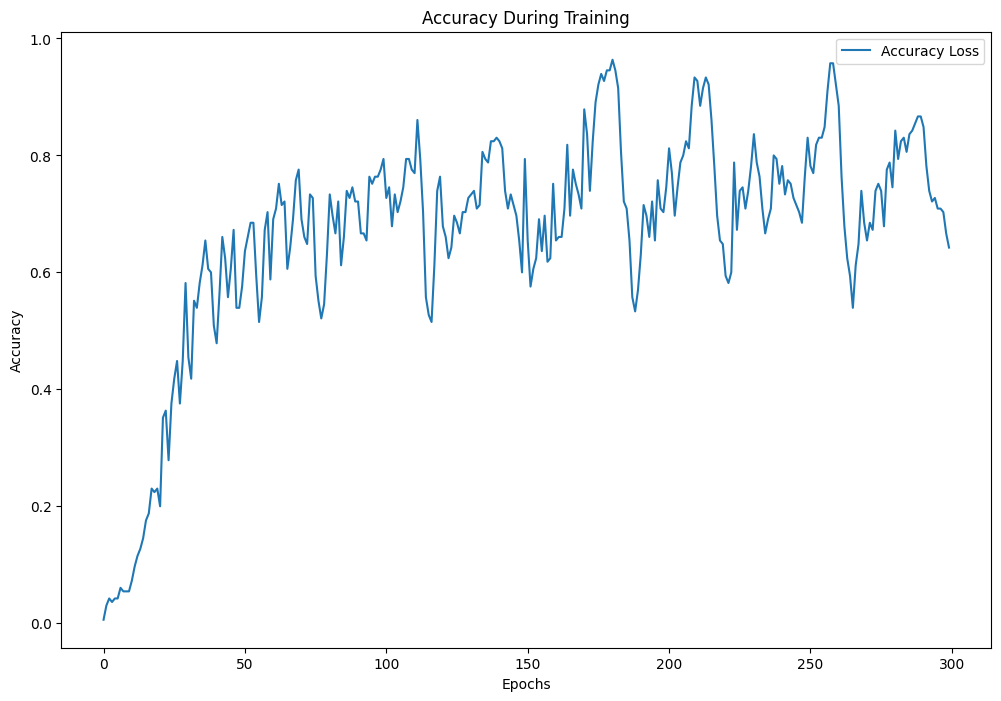

In [8]:
plt.figure(figsize=(12, 8))

# Plot the loss graph
plt.plot(history.history['accuracy'], label='Accuracy Loss')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
def MakePrediction(model, firstWords, max_length=10):
    sentence = firstWords.split()
    while len(sentence) <= max_length:
        encoded_input = np.array([[w2i[word] for word in sentence[-3:]]])
        y_pred = model.predict(encoded_input)
        pred_word = i2w[np.argmax(y_pred)]
        sentence.append(pred_word)
    return ' '.join(sentence)

In [10]:
print(MakePrediction(model2, "Mai cốt cách"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mai cốt cách tuyết tinh thần Mỗi người một vẻ mười
